# Map Visualisierung

Die Visualisierung basiert auf folgenden Blogpost, viel Code wurde übernommen: https://www.kdnuggets.com/2020/01/open-data-germany-maps-viz.html

In [16]:
import os
import descartes
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

dir = "."
dataDir = os.path.abspath(dir)

In [17]:
#Read CoVerage data lake
df_coverage = pd.read_csv(dataDir + "/TestLake.csv", delimiter=",", dtype={'postalCode': str})
df_coverage.head()

,gender,coronaVirus,postalCode,loneliness,diarrhea,userId,insomnia,limbPain,coughing,generalHealth,soreThroat,temperature,runnyNose,headache,id,numberOfContacts,timestamp,yearOfBirth,Unnamed: 18
0,3,2,63846,2,2,Joan Miro,"5,""1",2,4,3,2.0,1.0,2.0,429-43-3195,285.0,1.584836e+12,1960.0,NaN,NaN
1,2,3,73061,5,1,Warhol,"4,""2",1,5,2,1.0,1.0,2.0,781-25-7736,526.0,1.584836e+12,1956.0,NaN,NaN
2,2,1,61352,3,1,Kahlo,"1,""2",2,2,2,2.0,1.0,2.0,856-83-9821,22.0,1.584836e+12,2003.0,NaN,NaN
3,2,2,39606,2,2,Paul Klee,"1,""2",2,2,2,2.0,1.0,1.0,713-98-6049,597.0,1.584836e+12,2001.0,NaN,NaN
4,2,1,06796,2,2,Chagall,"4,""2",1,4,2,2.0,3.0,2.0,387-89-1125,688.0,1.584836e+12,1982.0,NaN,NaN


# Coronaviruserkrankungen

Ermitteln der Menschen die vermuten am Coronavirus erkrankt zu sein, sowie Ermittlung der Menschen die nachgewiesen
am Coronoavirus erkrankt sind für jede Postleitzahl.

In [18]:
#aggregate df_coverage
#count propable infections (2) 
df_cg1 = df_coverage.drop(columns = ["id","timestamp", "coughing","diarrhea","gender",
                                   "generalHealth","headache","insomnia","limbPain","loneliness",
                                   "numberOfContacts","runnyNose","soreThroat",
                                   "temperature","userId","yearOfBirth"])
df_cg1["guessed"] = np.where(df_cg1["coronaVirus"]==2, 1, 0)
df_cg1["confirmed"] = np.where(df_cg1["coronaVirus"]==3, 1, 0)

df_cg1.head(10)

,coronaVirus,postalCode,Unnamed: 18,guessed,confirmed
0,2,63846,NaN,1,0
1,3,73061,NaN,0,1
2,1,61352,NaN,0,0
3,2,39606,NaN,1,0
4,1,06796,NaN,0,0
5,2,84359,NaN,1,0
6,2,97778,NaN,1,0
7,2,73565,NaN,1,0
8,1,39646,NaN,0,0
9,1,23683,NaN,0,0


In [19]:
df_cg2a = df_cg1.groupby(["postalCode"])["guessed"].sum().reset_index()
df_cg2b = df_cg1.groupby(["postalCode"])["confirmed"].sum().reset_index()

df_cg2 = df_cg2a.merge(df_cg2b)
df_cg2["plz"] = df_cg2["postalCode"].astype(str)
df_cg2.drop(columns=["postalCode"], inplace=True)

df_cg2

,guessed,confirmed,plz
0,4,0,01067
1,9,2,01069
2,5,2,01097
3,10,0,01099
4,7,1,01108
5,4,0,01109
6,13,4,01127
7,6,3,01129
8,10,0,01139
9,2,0,01156


In [20]:
# add guessed to confirmed
df_cg3 = df_cg2.copy()
df_cg3["cases"] = df_cg2["guessed"] + df_cg2["confirmed"]
df_cg3.drop(columns = ["confirmed", "guessed"], inplace = True)

df_cg3

,plz,cases
0,01067,4
1,01069,11
2,01097,7
3,01099,10
4,01108,8
5,01109,4
6,01127,17
7,01129,9
8,01139,10
9,01156,2


In [21]:
# Read PLZ polygons
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('plz-gebiete/plz-gebiete.shp', dtype={'plz': str})
# plz_shape_df["plz"].to_csv("Postleitzahlen.csv")

In [22]:
#Init plot parameter
plt.rcParams['figure.figsize'] = [16, 11]

In [23]:
# Define cities to plot 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

In [24]:
# Merge plz_df and Coverage lake.
merged_cg2 = pd.merge(
    left=plz_shape_df, 
    right=df_cg2,
    on="plz",
    how='left'
)
merged_cg2.fillna(0, inplace=True)

merged_cg2.head()

,plz,note,geometry,guessed,confirmed
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",6,2
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",7,2
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,0
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ...",9,3
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ...",6,1


In [25]:
# Define plot feature
# plz_shape_df = plz_shape_df \
#     .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=4, stop=5))

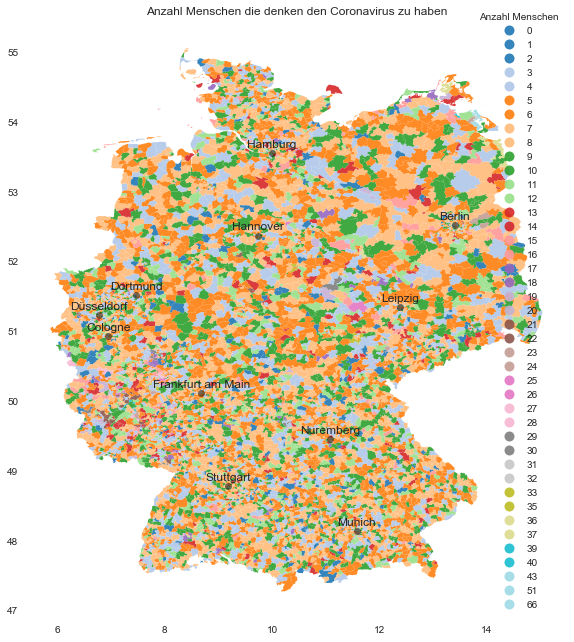

In [26]:
#Plot
fig, ax = plt.subplots()



#plot plz shape
merged_cg2.plot(
    ax=ax, 
    column='guessed', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Anzahl Menschen', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

#plot cities
for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Anzahl Menschen die denken den Coronavirus zu haben', 
    aspect=1.3,
    facecolor='white'
);

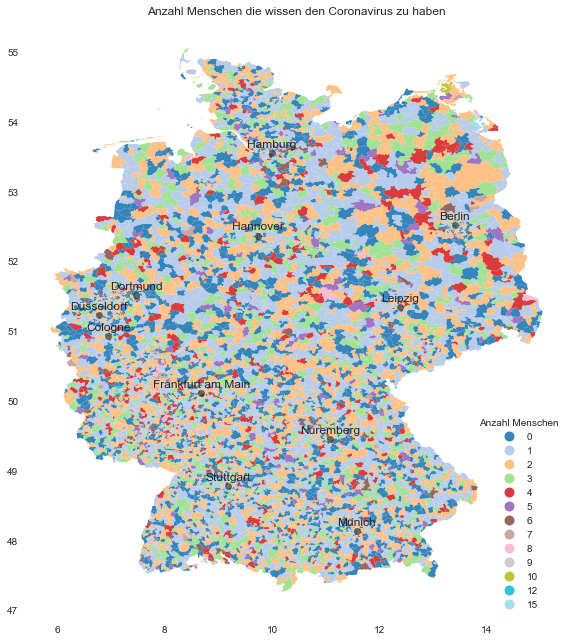

In [27]:
#Plot
fig, ax = plt.subplots()

#plot plz shape
merged_cg2.plot(
    ax=ax, 
    column='confirmed', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Anzahl Menschen', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

#plot cities
for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Anzahl Menschen die wissen den Coronavirus zu haben', 
    aspect=1.3,
    facecolor='white'
);

In [28]:
# Merge plz_df and Coverage lake.
merged_cg3 = pd.merge(
    left=plz_shape_df, 
    right=df_cg3,
    on="plz",
    how='left'
)
merged_cg3.fillna(0, inplace=True)

merged_cg3.head()

,plz,note,geometry,cases
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",8
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",9
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ...",12
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ...",7


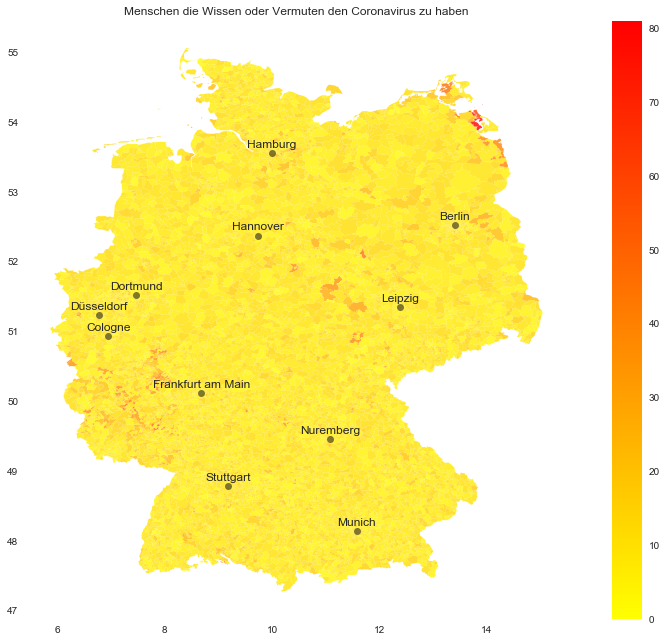

In [29]:
#Plot
fig, ax = plt.subplots()

#plot plz shape
merged_cg3.plot(
    ax=ax, 
    column='cases', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

#plot cities
for c in top_cities.keys():
    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Menschen die Wissen oder Vermuten den Coronavirus zu haben', 
    aspect=1.3,
    facecolor='white'
);

fig.savefig("coronavirus.pdf")